In [491]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.table import Table
from matplotlib.patches import Circle

In [492]:
#general Virgo v2 table
vf_full = Table.read(homedir+'/v2_snrcoadd.fits')
#general Virgo v2 env table
env_full = Table.read(homedir+'/Desktop/v2-20220820/vf_v2_environment.fits')

vf = vf_full[vf_full['sgacut_flag']]
env = env_full[vf_full['sgacut_flag']]

In [493]:
#divide subsample into environments
vf_cluster = vf[env['cluster_member']]
vf_rg = vf[env['rich_group_memb']]   #only galaxies in rich groups --> not in filaments, etc.
vf_fil = vf[env['filament_member']]
vf_pg = vf[env['poor_group_memb']]
vf_field = vf[env['pure_field']]

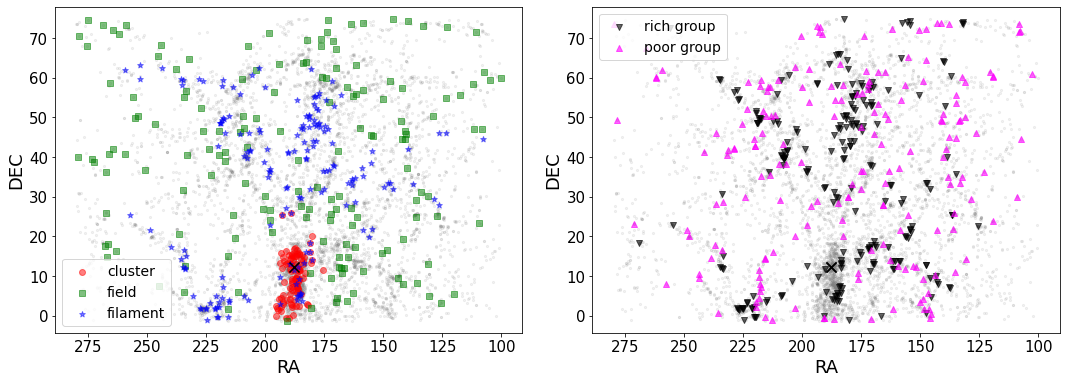

In [1196]:
vf_env = [vf_cluster,vf_field,vf_fil]
vf_group = [vf_rg,vf_pg]
vf_label = ['cluster','field','filament']
group_label = ['rich group','poor group']
markers = ['o','s','*']
markers_group = ['v','^']
vf_color=['red','green','blue']
group_color=['black','magenta']

fig=plt.figure(figsize=(18,6))

plt.subplots_adjust(hspace=.2,wspace=.15)
        
for n in range(0,2):
    ax=fig.add_subplot(1,2,n+1)

    ax.scatter(vf_full['RA_1'],vf_full['DEC_1'],s=5,alpha=0.1,color='gray')
    ax.scatter([187.7],[12.34],color='black',marker='x',s=100)
    
    plt.gca().invert_xaxis()
    plt.ylabel('DEC',fontsize=18)
    plt.xlabel('RA',fontsize=18)
    if n==0:
        for i in range(len(vf_env)):
            plt.scatter(vf_env[i]['RA_1'],vf_env[i]['DEC_1'],marker=markers[i],
                        label=vf_label[i],alpha=0.5,color=vf_color[i])
            plt.xticks(fontsize=15)
            plt.yticks(fontsize=15)
    if n==1:
        for i in range(len(vf_group)):
            plt.scatter(vf_group[i]['RA_1'],vf_group[i]['DEC_1'],marker=markers_group[i],
                        label=group_label[i],alpha=0.6,color=group_color[i])
            plt.xticks(fontsize=15)
            plt.yticks(fontsize=15)
        
    ax.scatter([187.7],[12.34],color='black',marker='x',s=100)
    plt.ylim(np.min(vf_full['DEC_1'])-3,np.max(vf_full['DEC_1'])+3)
    ax.legend(fontsize=14)


plt.savefig(homedir+'/Desktop/radec_env.png',dpi=300,bbox_inches='tight', pad_inches=0.2)

        
plt.show()

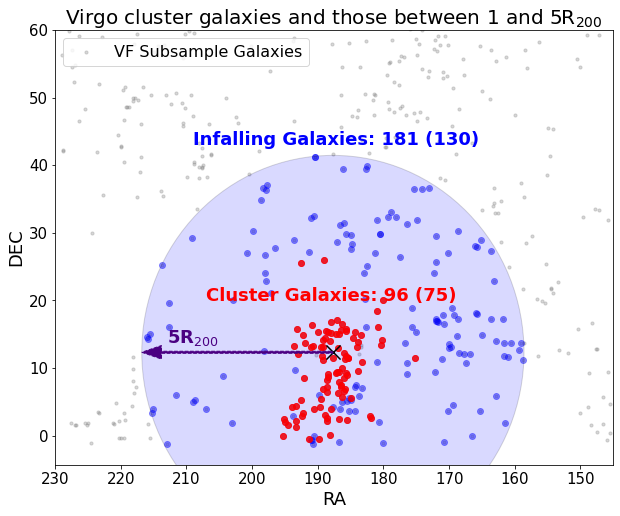

In [922]:
nser = Table.read(homedir+'/output_params_r_psf.fits')['nsersic']

RA_center = 187.70
DEC_center = 12.34
virial_radius = 5.8224 #(degrees)

five_vir = 5*virial_radius

fig, ax = plt.subplots(figsize=(10,8))
dist = np.sqrt((vf['RA_1']-RA_center)**2 + (vf['DEC_1']-DEC_center)**2)
virial_1flag = (dist<=virial_radius)
virial_5flag = (dist>virial_radius)&(dist<=five_vir)

plt.scatter(vf['RA_1'],vf['DEC_1'],alpha=0.3,s=10,color='gray',label='VF Subsample Galaxies')
#plt.scatter(vf['RA_1'][virial_1flag],vf['DEC_1'][virial_1flag],alpha=0.6,color='red')
plt.scatter(vf['RA_1'][virial_5flag & (~env['cluster_member'])],vf['DEC_1'][virial_5flag & (~env['cluster_member'])],alpha=0.4,color='blue')
plt.scatter(vf['RA_1'][env['cluster_member']],vf['DEC_1'][env['cluster_member']],alpha=0.6,color='red')

#circle_oneVR = plt.Circle((RA_center,DEC_center),virial_radius,facecolor='blue',edgecolor='black',alpha=0.15)
#ax.add_patch(circle_oneVR)
circle_fiveVR = plt.Circle((RA_center,DEC_center),virial_radius*5,facecolor='blue',edgecolor='black',alpha=0.15)
ax.add_patch(circle_fiveVR)

plt.scatter(vf['RA_1'][env['cluster_member']],vf['DEC_1'][env['cluster_member']],alpha=0.6,color='red')

plt.title(r'Virgo cluster galaxies and those between 1 and 5R$_{200}$',fontsize=20)

plt.ylim(np.min(vf_full['DEC_1'])-3,60)
plt.xlim(230,145)

plt.ylabel('DEC',fontsize=18)
plt.xlabel('RA',fontsize=18)

ax.scatter([187.7],[12.34],color='black',marker='x',s=200)

plt.arrow(RA_center, DEC_center, five_vir, 0, color='indigo', linestyle="--", length_includes_head=True,
          head_width=2, head_length=3, width=0.3)
plt.text(213,13.8,r'5R$_{200}$',color='indigo',fontsize=18,weight='bold')

plt.text(209,43,f'Infalling Galaxies: {len(vf[virial_5flag])} ({len(vf[virial_5flag & (nser<2)])})',color='blue',weight='bold',fontsize=18)
plt.text(207,20,f"Cluster Galaxies: {len(vf[env['cluster_member']])} ({len(vf[env['cluster_member']&(nser<2)])})",color='red',weight='bold',fontsize=18)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)    

plt.legend(fontsize=16,loc='upper left')

plt.savefig(homedir+'/Desktop/VF_infallcore.png', bbox_inches='tight', pad_inches=0.2, dpi=300)

#len(vf[env['cluster_member']&(nser<2)])

plt.show()

------------

In [1]:
#data analysis

Convolution:  True
No GALFIT data for 24 w3 galaxies and 39 r galaxies.
Total number of galaxies with GALFIT error flags: 124
Total number of galaxies: 702


<Figure size 432x288 with 0 Axes>

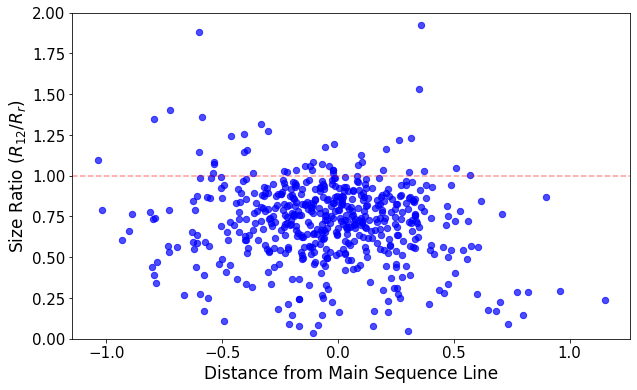

In [1352]:
%run ~/github/research/data_analysis/re_analysis.py
cat = catalogs(conv=True,MeanMedian='median',MADmultiplier=5000,cutAGN=False)
#cat.env_means(trimOutliers=True,savefig=False)
#cat.mass_hist_oneplot(savefig=True)

#cat.r12_vs_rstar(sfr_mstar='sfr',savefig=True)
#cat.r12_vs_rstar(sfr_mstar='mstar',savefig=False)

#cat.env_means(trimOutliers=True,errtype='bootstrap',savefig=True)   #for MADmultiplier=5000 and trimOutliers=True, removes the pesky outlier galaxy
#cat.recreate_LCS_hist(keep_errs=False,savefig=True)
#cat.recreate_LCS_mass(keep_errs=False,savefig=True)
#cat.mass_hist(z0mgs_comp=True,savefig=True)
#cat.envbins(savefig=False)
#cat.compareSGA(savefig=True)
#cat.sfrmstar(show_HI=False,show_sizerat=True,savefig=True)
cat.ratio_MS(showHI=False,savefig=True)

#cat.hist_dist_rats(savefig=True)

USAGE:
    lcs = catalogs(conv=False, MeanMedian='mean',cutAGN=False) --> initiate catalog class. 
        MeanMedian will propagate to all plots; can either be 'mean' or 'median.' cutAGN
        will do precisely that, flagging both BPT AGN and AGN based on WISE magnitude colors.
    lcs.wisesize_hist(savefig=False) --> generates vertically-oriented histogram subplots of 
        R12/Rr distribution, separated into cluster vs. all else (external).
    lcs.LCS_hist(ReDisk='Re',savefig=False) --> generates same type of histogram plot as above but with 
        the actual LCS values. 'Re' or 'Disk' to instruct which column to use for size ratios.
    lcs.wisesize_mass(savefig=False) --> generates scatterplot of size ratio vs. mass bin using 
        LCS data, the format being similar to a skeleton version of Figure 13 from Finn+18. 
        Masses are from John Moustakas' SED fitting. 
    lcs.wisesize_mass(nbins=3, savefig=False) --> generates scatterplot of size ratio vs. mass bin 
   

/Users/k215c316/github/research/data_analysis/LCS_comparison.py:95: RuntimeWarning: invalid value encountered in true_divide
  self.magphyscut = self.magphyscut[self.cut_flags]
/Users/k215c316/github/research/data_analysis/LCS_comparison.py:95: RuntimeWarning: invalid value encountered in log10
  self.magphyscut = self.magphyscut[self.cut_flags]


<Figure size 432x288 with 0 Axes>

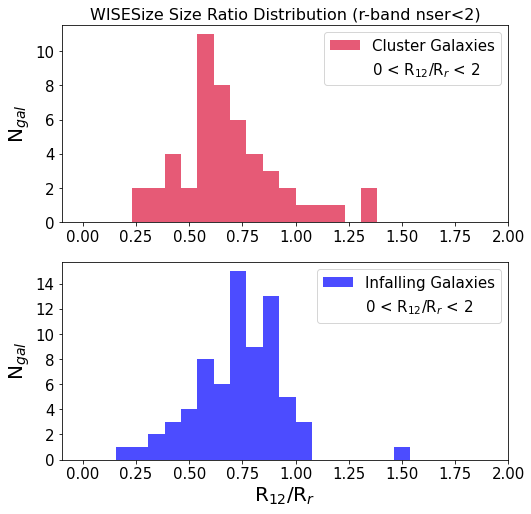

Note: the following results are for galaxies with size ratios <= 3

K-S p-value (> 0.003, "same distribution"):
0.03824

Mean core size ratio: 0.692
Median core size ratio: 0.682
Mean infalling size ratio: 0.734
Median infalling size ratio: 0.742

Core mean/median uncertainty: 0.034
Infalling mean/median uncertainty: 0.024


In [1236]:
%run LCS_comparison.py
lcs=catalogs(conv=True,MeanMedian='median',cutAGN=True)
#lcs.LCS_hist(ReDisk='Disk',savefig=False)
#lcs.LCS_hist(ReDisk='Re',savefig=False)
lcs.wisesize_hist(savefig=False)
#lcs.LCS_mass(ReDisk='Re',savefig=False)
#lcs.LCS_mass(ReDisk='Disk',savefig=False)
#lcs.wisesize_mass(nbins=3,savefig=True)

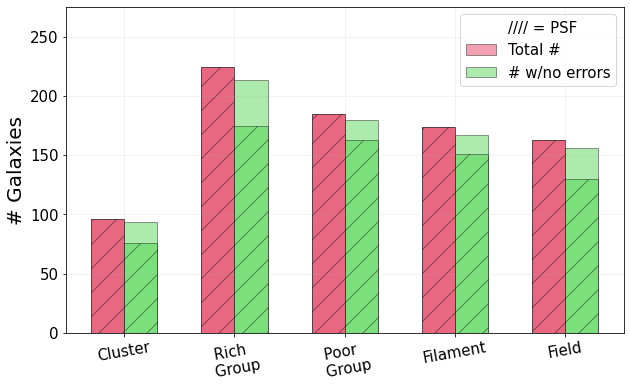

In [1019]:
env_names = ['Cluster','Rich \n Group','Poor \n Group','Filament','Field']
index = np.arange(1,6,1)

total_nopsf = np.array([96,224,185,174,163])
n_noerr_nopsf = np.array([94,213,180,167,156])
n_err_nopsf = np.array([2,11,5,7,7])

total_psf = np.array([96,224,185,174,163])
n_noerr_psf = np.array([76,175,163,151,130])
n_err_psf = np.array([20,49,22,23,33])

labels = ['Total #', '# w/no errors', '# w/ errors']
bar_color = ['crimson','limegreen','cyan']
bar_color = ['crimson','limegreen','cyan']

plt.figure(figsize=(10,6))

plt.xticks(index, env_names, rotation=10, fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.grid(alpha=0.2)
plt.ylabel(r'# Galaxies',fontsize=20)

for i in (index):
    if i==1:
        plt.bar(i-0.15,height=total_nopsf[i-1],width=0.3,color=bar_color[0],label=labels[0],alpha=0.4,edgecolor='black',zorder=1)
        plt.bar(i+0.15,height=n_noerr_nopsf[i-1],width=0.3,color=bar_color[1],label=labels[1],alpha=0.4,edgecolor='black',zorder=1)
        #plt.bar(i+0.2,height=n_err_nopsf[i-1],width=0.2,color=bar_color[2],label=labels[2],alpha=0.4,edgecolor='black',zorder=2)
        
        plt.bar(i-0.15,height=total_psf[i-1],width=0.3,color=bar_color[0],alpha=0.4,edgecolor='black',hatch='/',zorder=1)
        plt.bar(i+0.15,height=n_noerr_psf[i-1],width=0.3,color=bar_color[1],alpha=0.4,edgecolor='black',hatch='/',zorder=1)
        #plt.bar(i+0.2,height=n_err_psf[i-1],width=0.2,color=bar_color[2],alpha=0.4,edgecolor='black',hatch='/',zorder=1)
        
    else:
        plt.bar(i-0.15,height=total_nopsf[i-1],width=0.3,color=bar_color[0],alpha=0.4,edgecolor='black',zorder=1)
        plt.bar(i+0.15,height=n_noerr_nopsf[i-1],width=0.3,color=bar_color[1],alpha=0.4,edgecolor='black',zorder=1)
        #plt.bar(i+0.2,height=n_err_nopsf[i-1],width=0.2,color=bar_color[2],alpha=1,edgecolor='black',zorder=2)
        
        plt.bar(i-0.15,height=total_psf[i-1],width=0.3,color=bar_color[0],alpha=0.4,edgecolor='black',hatch='/',zorder=1)
        plt.bar(i+0.15,height=n_noerr_psf[i-1],width=0.3,color=bar_color[1],alpha=0.4,edgecolor='black',hatch='/',zorder=1)
        #plt.bar(i+0.2,height=n_err_psf[i-1],width=0.2,color=bar_color[2],alpha=0.4,edgecolor='black',hatch='/',zorder=1)
plt.scatter(2,50,color='white',s=0.001,label='//// = PSF')
        
plt.legend(fontsize=15)
plt.ylim(0,275)

plt.savefig('/Users/k215c316/Desktop/comp.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [191]:
#TROUBLE may instead be a consequence of the psf filename length...causes some sort of overflow/memory leak?

#nope. the problem was the PSF_oversampling parameter. I was claiming 8, which GALFIT treated as meaning that
#the psf pixscale was 1/8 that of the cutout. This wee trouble also accounts for why GALFIT ran for 702 galaxies
#in ~2 days (in series), as the program had to convolve, say, eight-times as much as when the pixscale=1.
#and the relative linear relation between the nopsf and psf data suggests that the interpreted pixscale 
#rendered the psf's effects...negligible? 
#I'm guessing the triviality of convolution declines as the psf's size declines.